<a href="https://colab.research.google.com/github/shirsh12/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCTION**
---
Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause. According to the WHO, an estimated 17.9 million people died from heart disease in 2016, representing 31% of all global deaths. Over three quarters of these deaths took place in low- and middle-income countries.

Of all heart diseases, coronary heart disease (aka heart attack) is by far the most common and the most fatal. In the United States, for example, it is estimated that someone has a heart attack every 40 seconds and about 805,000 Americans have a heart attack every year (CDC 2019).

The silver lining is that heart attacks are highly preventable and simple lifestyle modifications(such as reducing alcohol and tobacco use; eating healthily and exercising) coupled with early treatment greatly improves its prognosis. It is, however, difficult to identify high risk patients because of the multi-factorial nature of several contributory risk factors such as diabetes, high blood pressure, high cholesterol, et cetera. This is where machine learning and data mining come to the rescue.

Doctors and scientists alike have turned to machine learning (ML) techniques to develop screening tools and this is because of their superiority in pattern recognition and classification as compared to other traditional statistical approaches.

In this project, I will be giving you a walk through on the development of a screening tool for predicting whether a patient has 10-year risk of developing coronary heart disease(CHD) using different Machine Learning techniques 

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
#loading data set
path= "/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Team Capstone Project - Cardiovascular Risk Prediction/data_cardiovascular_risk.csv"

main_data = pd.read_csv(path)

In [ ]:
#view
main_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0



The dataset is from an ongoing cardiovascular studyon residents of the town of Framingham,Massachusetts. The classification goal is to predictwhether the patient has a 10-year risk offuture coronary heart disease (CHD). The dataset providesthe patients’ information. It includesover 4,000 records and 15 attributes.VariablesEach attribute is a potential risk factor. There are both demographic, behavioral, and medical riskfactors.
#**Data DescriptionDemographic:**

*  Sex: male or female("M" or "F")
*  Age: Age of the patient;(Continuous - Although therecorded ages have been truncated towhole numbers, the concept of age is continuous)Behavioral
* is_smoking: whether or not the patient is a currentsmoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that theperson smoked on average in one day.(can beconsidered continuous as one can have any number ofcigarettes, even half a cigarette.)Medical( history)
* BP Meds: whether or not the patient was on bloodpressure medication (Nominal)
* Prevalent Stroke: whether or not the patient hadpreviously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive(Nominal)
* Diabetes: whether or not the patient had diabetes(Nominal)Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medicalresearch, variables such as heart rate though infact discrete, yet are considered continuous becauseof large number of possible values.)
* Glucose: glucose level (Continuous)Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary:“1”, means “Yes”, “0” means “No”) -DV


In [ ]:
#descriptive stats
main_data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## Goal : **Given this problem statement we have to build a Predictive Model which will give early detections of heart disease**

## For this problem our target variable : TenYearCHD

In [ ]:
round(main_data.value_counts("TenYearCHD")/main_data.shape[0],2)

TenYearCHD
0    0.85
1    0.15
dtype: float64

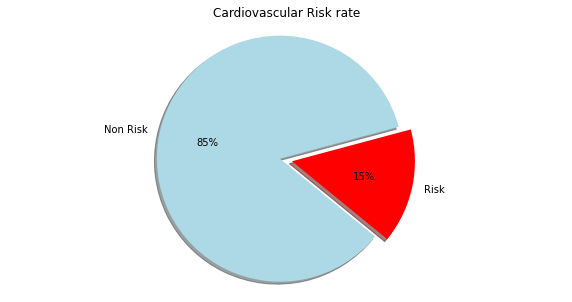

In [ ]:
labels = 'Non Risk',"Risk"
my_colors = ['lightblue','red']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(main_data['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()



## Here we see there is a huge class imbalancedment.

##**Renaming the Target variable "TenYearCHD" as RISK** 

In [ ]:
main_data.rename(columns={"TenYearCHD":"RISK"},inplace=True)

In [ ]:
main_data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'RISK'],
      dtype='object')

In [ ]:
#Sanity check
round(main_data.isnull().sum()/main_data.shape[0]*100,2).sort_values(ascending=False).head()

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
dtype: float64

## Except the feature name glucose all other features in the dataset have less than 5% null values.

In [ ]:
#Dropping redundant variable "id"
main_data.drop("id",axis=1,inplace=True)

In [ ]:
main_data.shape

(3390, 16)

## Following Dataset has 3390 records and **15 Features** which are responsible for "Cardiovascular Risk".

#**Project Work flow**
---

1. Splitting to Train,Validation and Test sets to avoid Data bleeding.

2. Simultaneously Data Cleaning of Train and Test sets

3. EDA on features

4. Feature cleaning if needed

5. Solving Class Imbalancedment problem

6. Base Model and Candidate Models

7. There Hypertuning

8. Bias-Variance tradeoff 

9. Creating Voting Classifier

10. Final Predictions
--- 





##**1. To avoid bleeding of data, splitting the whole Dataset in Train , Validation and Test sets.**

We want to (approximately) keep the proportion of Target values through the training and test sets, Hence we will pass stratify=Target. This will enable stratified splitting:

In [ ]:
X= main_data.drop('RISK',axis=1)
Y= main_data["RISK"]

In [ ]:
len(X),len(Y)

(3390, 3390)

In [ ]:
from sklearn.model_selection import train_test_split
train_X ,final_testX,train_Y, final_testY = train_test_split(X,Y,test_size=0.2 , stratify=Y,random_state=1) 

print("Train set",":",train_X.shape[0])


print("Test set",":",final_testX.shape[0])

Train set : 2712
Test set : 678


### Combining the Train features and target set for ease.

In [ ]:
train_df= pd.concat([train_X,train_Y],axis=1)

In [ ]:
print(train_df.shape)
train_df.head()

(2712, 16)


,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RISK
542,49,2.0,F,YES,20.0,0.0,0,0,0,229.0,118.5,76.5,21.42,76.0,NaN,0
2726,51,3.0,M,NO,0.0,0.0,0,0,0,215.0,147.0,96.0,28.59,65.0,100.0,0
3067,57,1.0,F,YES,1.0,0.0,0,1,0,254.0,146.5,81.0,41.61,72.0,85.0,1
204,59,4.0,F,NO,0.0,1.0,0,1,0,282.0,135.0,87.0,28.96,72.0,NaN,0
329,52,1.0,F,NO,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN,0


In [ ]:
final_testX.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1532,42,2.0,M,YES,30.0,0.0,0,0,0,256.0,111.0,62.0,21.67,74.0,74.0
818,60,1.0,M,YES,9.0,0.0,0,0,0,166.0,141.0,81.0,19.42,67.0,101.0
2830,55,2.0,M,NO,0.0,0.0,0,0,0,309.0,126.0,88.0,26.77,68.0,NaN
1202,45,4.0,M,YES,5.0,0.0,0,1,0,227.0,166.0,102.0,29.32,58.0,85.0
1053,58,3.0,F,NO,0.0,0.0,0,1,0,287.0,144.0,84.0,21.81,69.0,68.0


In [ ]:
print(train_df.value_counts("RISK")/train_df.shape[0])

print(final_testY.value_counts()/final_testY.shape[0])

RISK
0    0.849189
1    0.150811
dtype: float64
0    0.849558
1    0.150442
Name: RISK, dtype: float64


Looks our data perfectly stratify

##**2.Simultaneous Data Cleaning and Null value imputation in both train and test**
---
* Identify the categorical and numerical columns to check the data distribution
##### Data Preprocessing class with the following functions using **KNNImputer** for continous and **SimpleImputer** for Categories :
<ul>
    <li><b>missing_value_continuous</b>: function to handle missing values of continuous variables</li>
    <li><b>missing_value_categorical</b>: function to handle missing values of categorical variables</li>
    <li><b>outlier_treatment</b>: function to handle continuous outliers in the dataset</li>
</ul>

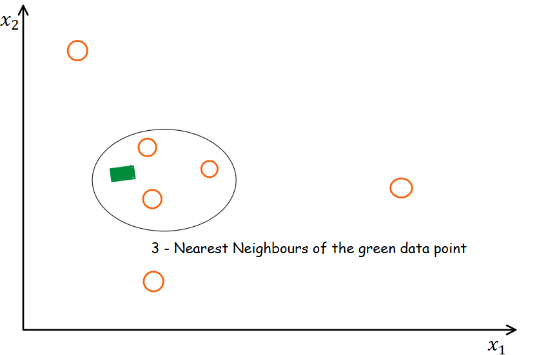

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 542 to 682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2712 non-null   int64  
 1   education        2643 non-null   float64
 2   sex              2712 non-null   object 
 3   is_smoking       2712 non-null   object 
 4   cigsPerDay       2695 non-null   float64
 5   BPMeds           2679 non-null   float64
 6   prevalentStroke  2712 non-null   int64  
 7   prevalentHyp     2712 non-null   int64  
 8   diabetes         2712 non-null   int64  
 9   totChol          2681 non-null   float64
 10  sysBP            2712 non-null   float64
 11  diaBP            2712 non-null   float64
 12  BMI              2701 non-null   float64
 13  heartRate        2711 non-null   float64
 14  glucose          2473 non-null   float64
 15  RISK             2712 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 360.2+ KB


In [ ]:
column_datatypes= train_df.drop("RISK",axis=1).dtypes
categorical_columns=list(column_datatypes[column_datatypes=="object"].index.values)
continous_columns=list(column_datatypes[(column_datatypes=="int64") | (column_datatypes=="float64") ].index.values)

In [ ]:
class Data_preprocessing:
  def __init__(self,train_data):
        self.train_data = train_data

  def missing_value_continous(self,columns_with_specific_type,neighbors=3):
    knn_imputer= KNNImputer(n_neighbors=neighbors)
    knn_imputer.fit(self.train_data[columns_with_specific_type])
    self.train_data[columns_with_specific_type]= knn_imputer.transform(self.train_data[columns_with_specific_type])
    return self.train_data

  def missing_value_categorical(self,columns_with_specific_type,imputation_type="most_frequent"):
   most_frequent= SimpleImputer(strategy="most_frequent")
   most_frequent.fit(self.train_data[columns_with_specific_type])
   self.train_data[columns_with_specific_type]= most_frequent.transform(self.train_data[columns_with_specific_type])
   return self.train_data

  def outlier_treatment(self,Q1,Q3,IQR,columns_with_outlier,action):
     ''' 
     Finding Outliers and Imputing them by mean/median to avoid loss of data
     '''
     if action=="median":
       for i in range(len(columns_with_outlier)):
         column_name= columns_with_outlier[i]
         meadian_outlier=np.median(self.train_data[column_name])
         self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]- (1.5*IQR[column_name])))| (self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))) )].index,column_name]=meadian_outlier

  
     if action== "mean":
       for i in range(len(columns_with_outlier)):
         column_name= columns_with_outlier[i]
         mean_outlier=np.mean(self.train_data[column_name])
         self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]- (1.5*IQR[column_name])))| (self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))) )].index,column_name]=mean_outlier
     return self.train_data


In [ ]:
dlist= [train_df,final_testX]
for df in dlist:
  #create class object
  dat= Data_preprocessing(df)
  df= dat.missing_value_continous(continous_columns)
  df= dat.missing_value_categorical(categorical_columns)

In [ ]:
print(train_df.isnull().sum())
print('-'*100)
print(final_testX.isnull().sum())

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
RISK               0
dtype: int64
----------------------------------------------------------------------------------------------------
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64


## **Handling Outliers**

## Outliers in train set

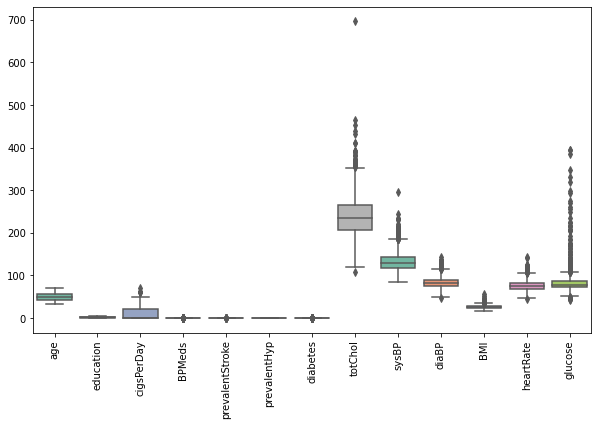

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
ax= sns.boxplot(data=train_df[continous_columns],orient='v',palette='Set2')

In [ ]:
train_outliers= ["cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]

## Outliers in test set

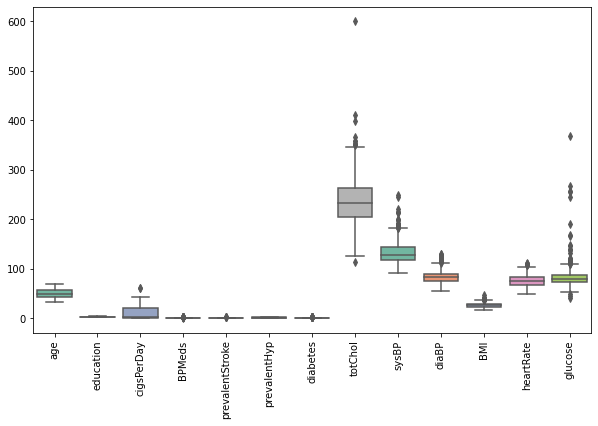

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
ax= sns.boxplot(data=final_testX[continous_columns],orient='v',palette='Set2')

In [ ]:
test_outliers=train_outliers

### both have same outlier columns

In [ ]:
#compute outlier treatment
ldf=[train_df,final_testX]
for df in ldf:
  dat= Data_preprocessing(df)
  Q1= df[continous_columns].quantile(0.25)
  Q3= df[continous_columns].quantile(0.75)
  IQR= (Q3-Q1)
  df= dat.outlier_treatment(Q1,Q3,IQR,train_outliers,"median")


##Treatment Done!

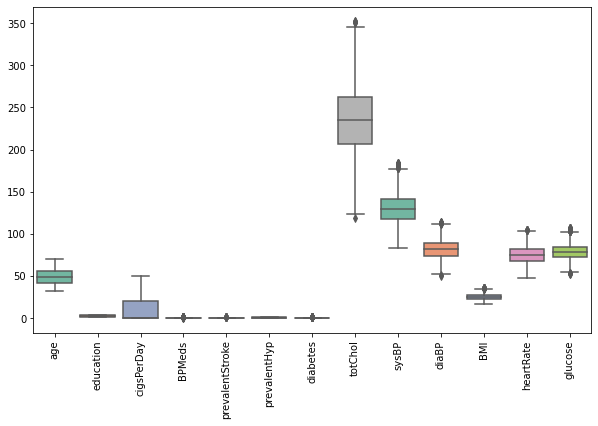

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
ax= sns.boxplot(data=train_df[continous_columns],orient='v',palette='Set2')

## **3. EDA on features to find some pattern using training data set**
---

###**AGE and Sex**

In [ ]:
train_df['sex'].unique()

array(['F', 'M'], dtype=object)

Text(0.5, 1.0, 'Male')

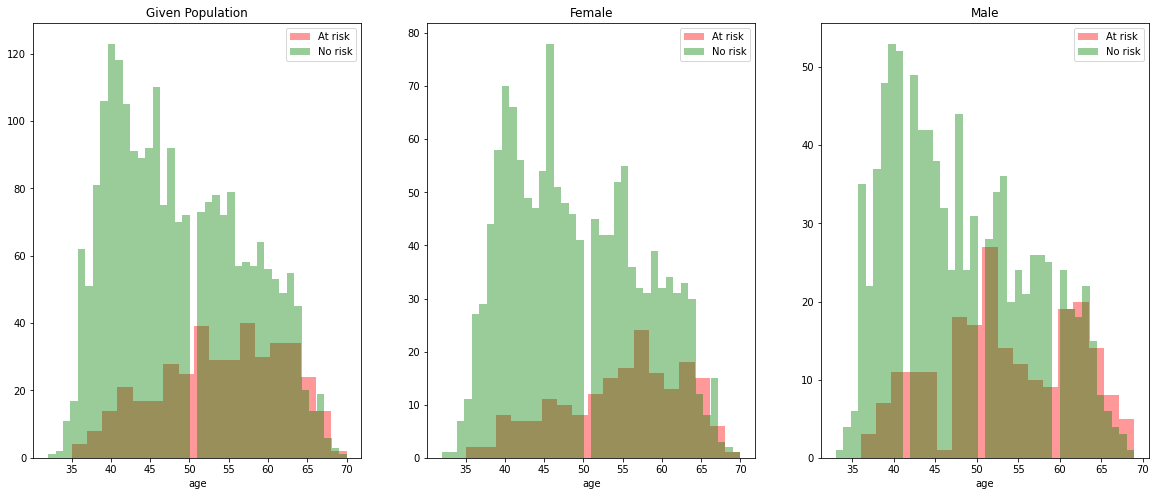

In [ ]:
at_risk = "At risk"
no_risk= "No risk"
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax= sns.distplot(train_df[train_df['RISK']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(train_df[train_df['RISK']==0].age,bins=40,label=no_risk,ax=axes[0],color='g' ,kde=False)
ax.legend()
ax.set_title("Given Population")
women= train_df[train_df['sex']=="F"]
men= train_df[train_df['sex']=="M"]
ax= sns.distplot(women[women['RISK']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(women[women['RISK']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['RISK']==1].age,bins=18,label=at_risk,ax=axes[2],color='r',kde=False)
ax= sns.distplot(men[men['RISK']==0].age,bins=40,label=no_risk,ax=axes[2],color='g',kde=False)
ax.legend()
ax.set_title("Male")



##**INSIGHTS :**
From the above graphs we can say that:
1. Both Women and Men lying in Age group of 50-52 have high risk of heart disease.
2. Men lying in age group 40-42 are at risk.
3. Men having age more than 65 are also at risk.

## **Age and Smoking**

Text(0.5, 1.0, 'NonSmokers')

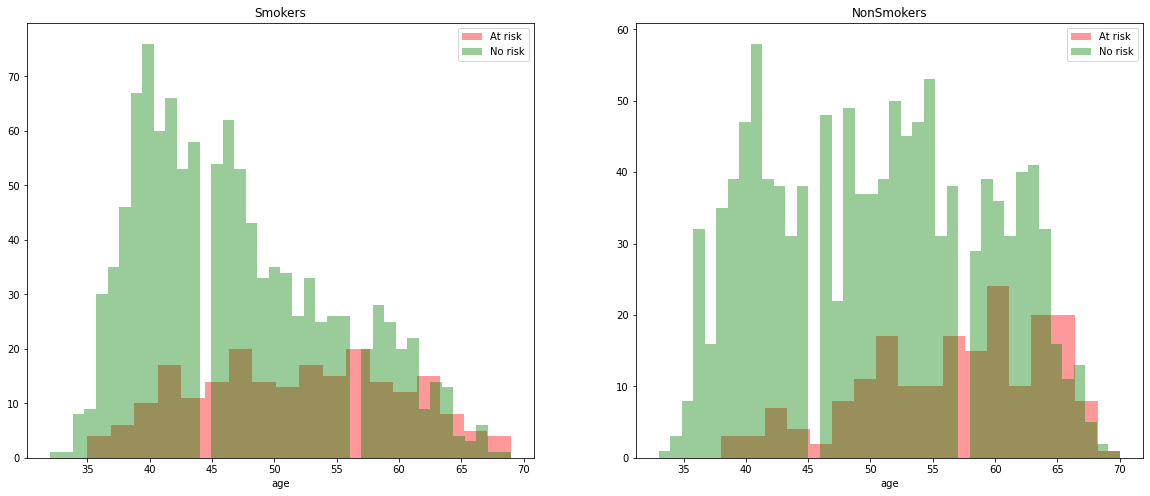

In [ ]:
at_risk = "At risk"
no_risk= "No risk"
smoking= train_df[train_df['is_smoking']=="YES"]
non_smoking= train_df[train_df['is_smoking']=="NO"]
fig , axes= plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax= sns.distplot(smoking[train_df['RISK']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(smoking[train_df['RISK']==0].age,bins=40,label=no_risk,ax=axes[0],color='g',kde=False)
ax.legend()
ax.set_title("Smokers")

ax= sns.distplot(non_smoking[train_df['RISK']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(non_smoking[train_df['RISK']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("NonSmokers")





##**INSIGHTS:**
Again we see Risk is High in same age group despite they are Smokers or not.

In [ ]:
train_df['is_smoking'].unique()

array(['YES', 'NO'], dtype=object)

##**Cigs(Cigerettes smoke by a Person per day) ,Sex,RISK**

In [ ]:
train_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'RISK'],
      dtype='object')

In [ ]:
train_df['cigsPerDay']=train_df['cigsPerDay'].astype(int)

In [ ]:
final_testX['cigsPerDay']=final_testX['cigsPerDay'].astype(int)

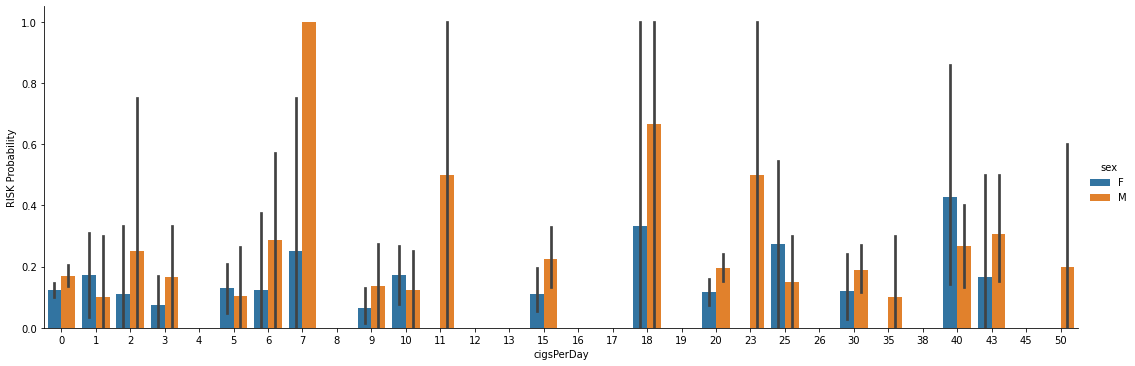

In [ ]:
g=sns.factorplot('cigsPerDay','RISK',kind='bar',
                    data=train_df,hue='sex',aspect=3)
g=g.set_ylabels("RISK Probability")

## **INSIGHTS:**
1. Both Male,Female who are non smoker or smoke less than 4 cigs per day have very low risk of Heart disease

2. All those men who smoke 7 cigs definitely got a heart disease.

### Converting following columns : **'BPMeds' ,'prevalentStroke', 'prevalentHyp', 'diabetes'** into categorical column

In [ ]:
ldf= [train_df,final_testX]
tocat=['prevalentStroke', 'prevalentHyp', 'diabetes']
for df in ldf:
  for col in tocat:
    df[col]=df[col].astype('category')

## **Diabetes** 

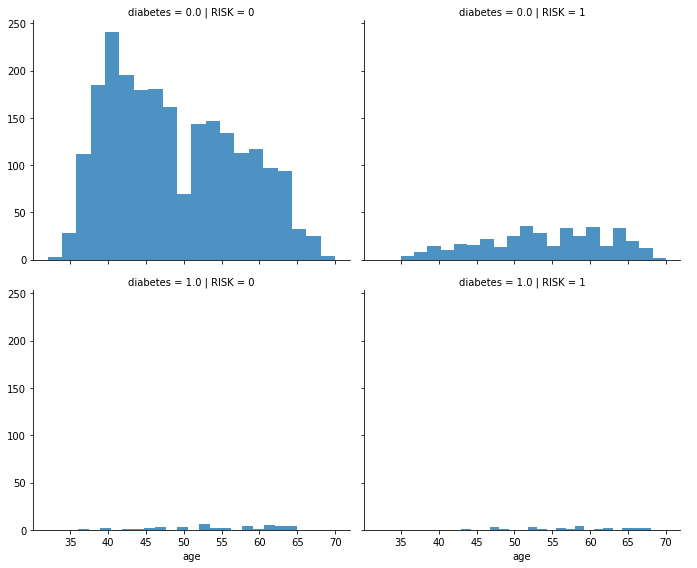

In [ ]:
grid= sns.FacetGrid(train_df,col='RISK',row='diabetes',size=4,aspect=1.2,palette='viridis')
grid.map(plt.hist,'age',alpha=.8,bins=20)
grid.add_legend();

##**INSIGHTS:**
In general People who don't have diabetes also don't have Heart disease.

##**Numerical Variables VS Risk**

In [ ]:
numerical_col=continous_columns[7:]
print(numerical_col)

['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


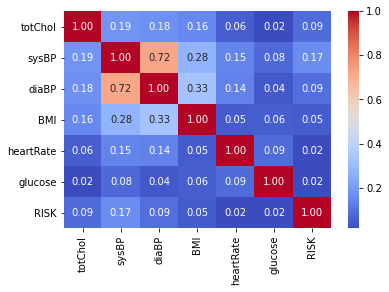

In [ ]:
#correlation matrix between numerical variables and RISK of getting heart disease
numerical_col.append('RISK')
g= sns.heatmap(train_df[numerical_col].corr(),annot=True,fmt='.2f',cmap='coolwarm')


"diaBP" and "sysBP" are highly correlated
1. diaBP is Diastolic Pressure
2. sysBP is Systolic Pressure

We generally while measuring our BP look for there Ratio 
e.g a healthy person has 120/80 

##Deriving new feature **AvgBP** = **sysBP+diaBP/2** and dropping diaBP


In [ ]:
X_df=train_df.copy()
Xt_df=final_testX.copy()

In [ ]:
ldf=[train_df,final_testX]
for df in ldf:
  df['bp_ratio']= round(df["sysBP"]/df["diaBP"],2)
  #df["avgBP"]= round((df["sysBP"]+df["diaBP"])/2,2)
  df.drop("diaBP",axis=1,inplace=True)
  #df.drop("sysBP",axis=1,inplace=True)
  

In [ ]:
numerical_col=['RISK','totChol', 'bp_ratio','sysBP', 'BMI', 'heartRate', 'glucose']

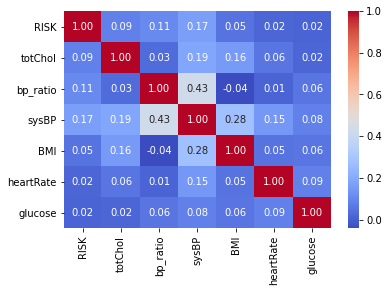

In [ ]:
#correlation matrix between numerical variables and RISK of getting heart disease
g= sns.heatmap(train_df[numerical_col].corr(),annot=True,fmt='.2f',cmap='coolwarm')


Apparently there is no direct linear relationship between the numerical features and Risk of getting heart disease.

## Checking for **'prevalentStroke'** and **'prevalentHyp'** cases with respect to Risk of getting disease.

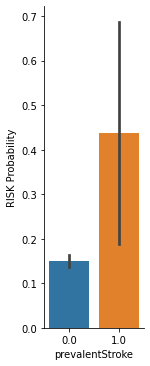

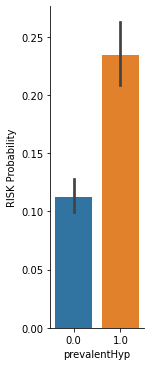

In [ ]:
ax=sns.factorplot('prevalentStroke','RISK',kind='bar',
                    data=train_df,size=5,aspect=0.4)
ax=ax.set_ylabels("RISK Probability")
ax=sns.factorplot('prevalentHyp','RISK',kind='bar',
                    data=train_df,size=5,aspect=0.4)
ax=ax.set_ylabels("RISK Probability")

## **INSIGHTS:** 
People who had earlier got a stroke and Hypertension have  high chance of getting the heart disease.

## lets check how this Feature **Education** is related with heart disease

Text(0.5, 1.0, 'Education')

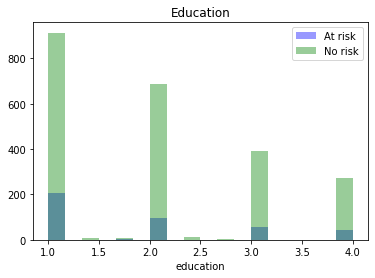

In [ ]:
at_risk = "At risk"
no_risk= "No risk"
ax=sns.distplot(train_df[train_df['RISK']==1].education,bins=18,label=at_risk,color='b',kde=False)
ax=sns.distplot(train_df[train_df['RISK']==0].education,bins=18,label=no_risk,color='g',kde=False)
ax.legend()
ax.set_title('Education')


## **InSIGHTS** 
Not much we can intrepret but we can say people with lower education level are at higher risk of getting heart disease

##**4. Feature Engineering**
---

##**AGE**
*  From the above EDA we try to establish some patterns which influence the cause of heart disease in that we found people both men and women lying in a particular age group **40-42, 50-51** are more prone to heart disease.

* So what I want to try is to create age buckets of population e.g 18-25 -> **20s**, 25-40 -> **Mid30s**
etc in this way we can target the particular age group which have high risk of Heart disease.


In [ ]:
train_df.age.describe()

count    2712.000000
mean       49.580015
std         8.585428
min        32.000000
25%        42.000000
50%        49.000000
75%        56.250000
max        70.000000
Name: age, dtype: float64

In [ ]:
ldf=[train_df,final_testX]
for df in ldf:
  df['Age_Bucket']=pd.cut(df.age,bins=10,labels=['Early30','Mid30','Early40','Mid40','late40',
                                               'Early50','Mid50','late50','Mid60','late60'])

In [ ]:
ldf=[train_df,final_testX]
for df in ldf:
  print(df["Age_Bucket"].value_counts())
  print('-'*100)

Early40    475
Mid40      407
late40     365
Mid50      320
Mid30      315
late50     286
Early50    275
Mid60      192
late60      45
Early30     32
Name: Age_Bucket, dtype: int64
----------------------------------------------------------------------------------------------------
Mid40      107
late40     102
Mid30       96
Mid50       80
Early40     74
Early50     64
Mid60       59
late50      55
Early30     28
late60      13
Name: Age_Bucket, dtype: int64
----------------------------------------------------------------------------------------------------


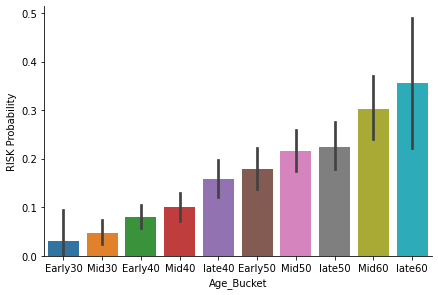

In [ ]:
ax=sns.factorplot('Age_Bucket','RISK',kind='bar',
                    data=train_df,size=4,aspect=1.5)
ax=ax.set_ylabels("RISK Probability")

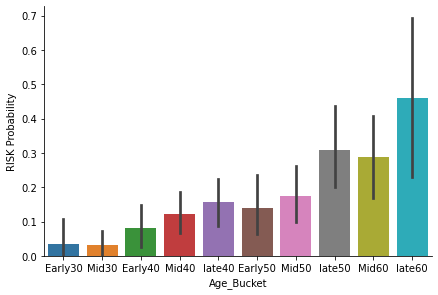

In [ ]:
ax=sns.factorplot('Age_Bucket',final_testY,kind='bar',
                    data=final_testX,size=4,aspect=1.5)
ax=ax.set_ylabels("RISK Probability")

## **INSIGHTS**
Now we are seeing some good info both on training and testing data, **as the age of person increase risk of getting Heart Disease Increases**

##**BP Bucket**
Just out of a common thought a lot many people told highBP leads to high disease lets check

In [ ]:
ldf=[train_df,final_testX]
for df in ldf:
  df['BP_Bucket']= pd.cut(df.sysBP,bins=5,labels=['Very_Low_BP','lowBP','healthyBP','HighBP','Very_high_BP'])

In [ ]:
train_df['BP_Bucket'].value_counts()

healthyBP       1084
lowBP            919
HighBP           425
Very_high_BP     157
Very_Low_BP      127
Name: BP_Bucket, dtype: int64

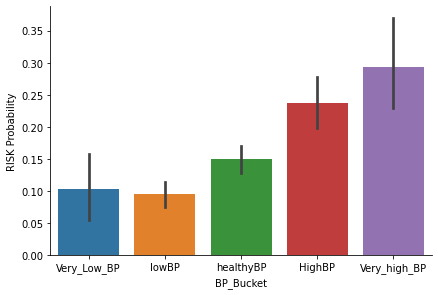

In [ ]:
ax=sns.factorplot('BP_Bucket','RISK',kind='bar',
                    data=train_df,size=4,aspect=1.5)
ax=ax.set_ylabels("RISK Probability")

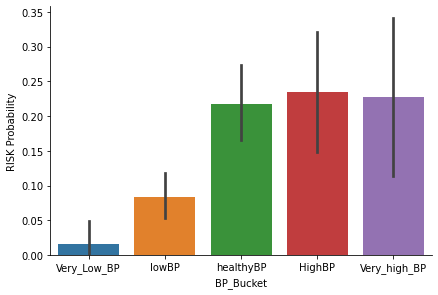

In [ ]:
ax=sns.factorplot('BP_Bucket',final_testY,kind='bar',
                    data=final_testX,size=4,aspect=1.5)
ax=ax.set_ylabels("RISK Probability")

## **EDA CONCLUSIONS**
---
Due to the imbalanced nature of the data set it was difficult to make conclusions but based on what is observed but these are the conclusions that could be drawn:

1.    *Slightly more males are suffering from CHD than females.*
2.    *The percentage of people who have CHD is almost equal between smokers and non smokers.*
3.   *The percentage of people who have CHD is higher among the diabetic, and those with prevalent hypertension as compared to those who don’t have similar morbidities.*
4.   *A larger percentage of the people who have CHD are on blood pressure medication.*

5.  *Another interesting trend I checked for was the distribution of the ages of the people who had CHD and the number of the sick generally increased with age with the peak being at 63 years old.*

---

In [ ]:
df=train_df.copy()
fdf=final_testX.copy()

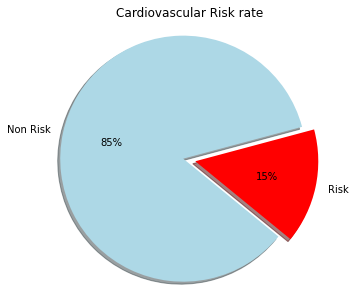

In [ ]:
labels = 'Non Risk',"Risk"
my_colors = ['lightblue','red']
my_explode = (0,0.1)
plt.figure(figsize=(6,5))
plt.pie(train_df['RISK'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()



##**5.Class Imbalanced issue and Evaluation-metric to be chosen**
---
### In this problem we have a dataset of patients where we have to find out whether the given features or symptom a person has he/she has a Cardiovascular disease in future.

But here’s the catch… the risk rate is relatively rare, only 15% of the people have this disease.








Well, let's guess what? We created a ML model and our “solution” would have 94% accuracy!

Unfortunately, that accuracy is misleading.

* All those non-risk cases, we’d have 100% accuracy.
* Those cases in which a person has a risk, we’d have 0% accuracy.
* Our overall accuracy would be high simply because the most cases are not getting the disease.

This is clearly a problem because many machine learning algorithms are designed to maximize overall accuracy.

## The Metric Trap

One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predict” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.



## For the given binary classification problem **Recall** of the ML model should be very high.
The False Negative or TypeII error should be zero

# Resampling Techniques

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

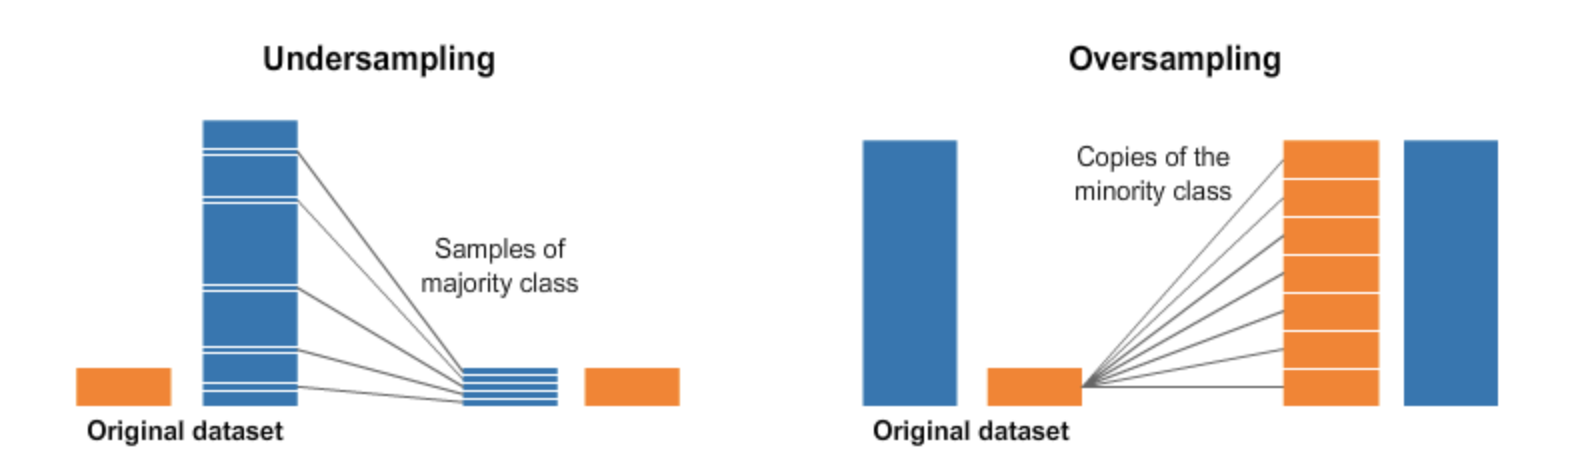

# **Random Over-Sampling**

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

##**6.Model Trainning**
---

**Preprocessing**

Encoding the binary categorical features

In [ ]:
[{col:train_df[col].unique()} for col in categorical_columns]

[{'sex': array(['F', 'M'], dtype=object)},
 {'is_smoking': array(['YES', 'NO'], dtype=object)}]

In [ ]:
def preprocess_inputs(df):
  df=df.copy()
  #binary encoding
  df['sex']= df['sex'].apply(lambda x: 1 if x=='M' else 0)
  df['is_smoking']= df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

  #Extract numerical features
  num_df= df.select_dtypes(include=['int8','int32','int64','float64'])

  #Extract categorical features
  cat_df= df.select_dtypes(include=['category','object'])

  #One hot encode categorical variables
  features_cat= pd.get_dummies(cat_df,drop_first=True)

  #concat the features
  df= pd.concat([num_df,features_cat],axis=1)
  
  return df

In [ ]:
train_data= preprocess_inputs(train_df)
test_data= preprocess_inputs(final_testX)

In [ ]:
train_data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,totChol,sysBP,BMI,heartRate,glucose,RISK,bp_ratio,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0,Age_Bucket_Mid30,Age_Bucket_Early40,Age_Bucket_Mid40,Age_Bucket_late40,Age_Bucket_Early50,Age_Bucket_Mid50,Age_Bucket_late50,Age_Bucket_Mid60,Age_Bucket_late60,BP_Bucket_lowBP,BP_Bucket_healthyBP,BP_Bucket_HighBP,BP_Bucket_Very_high_BP
542,49.0,2.0,0,1,20,0.0,229.0,118.5,21.42,76.0,72.333333,0,1.55,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2726,51.0,3.0,1,0,0,0.0,215.0,147.0,28.59,65.0,100.000000,0,1.53,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3067,57.0,1.0,0,1,1,0.0,254.0,146.5,25.38,72.0,85.000000,1,1.81,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
204,59.0,4.0,0,0,0,1.0,282.0,135.0,28.96,72.0,85.666667,0,1.55,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
329,52.0,1.0,0,0,0,0.0,275.0,112.0,25.68,80.0,82.000000,0,1.58,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


##**Data Ready to be feeden**

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
#Sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Evaluation metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
import sklearn.metrics as metrics

# Import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
#Features and Target
X= train_data.drop('RISK',axis=1)
y=train_data['RISK']

###**Applying Random Oversampler**

In [ ]:
ros = RandomOverSampler(random_state=0)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X,y)

print('Original dataset shape', len(y))
print('Resampled dataset shape', len(y_ros))

Original dataset shape 2712
Resampled dataset shape 4606


In [ ]:
#scaling both Train ,test and validation sets
sc_X= StandardScaler()
X_train=sc_X.fit_transform(x_ros)
test_data=sc_X.fit_transform(test_data)

In [ ]:
#scaled dataframe
pd.DataFrame(X_train,columns=X.columns).head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,totChol,sysBP,BMI,heartRate,glucose,bp_ratio,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0,Age_Bucket_Mid30,Age_Bucket_Early40,Age_Bucket_Mid40,Age_Bucket_late40,Age_Bucket_Early50,Age_Bucket_Mid50,Age_Bucket_late50,Age_Bucket_Mid60,Age_Bucket_late60,BP_Bucket_lowBP,BP_Bucket_healthyBP,BP_Bucket_HighBP,BP_Bucket_Very_high_BP
0,-0.278825,0.078979,-0.959566,0.966686,0.838818,-0.223524,-0.235106,-0.770255,-1.185870,0.037426,-0.609493,-0.319776,-0.105813,-0.784946,-0.203408,-0.30372,-0.414022,-0.373544,2.540290,-0.352862,-0.410417,-0.378433,-0.335901,-0.156417,1.543305,-0.818196,-0.482907,-0.293368
1,-0.048834,1.060386,1.042138,-1.034462,-0.802855,-0.223524,-0.573427,0.722649,0.806895,-0.978770,2.091705,-0.428980,-0.105813,-0.784946,-0.203408,-0.30372,-0.414022,-0.373544,2.540290,-0.352862,-0.410417,-0.378433,-0.335901,-0.156417,-0.647960,-0.818196,2.070791,-0.293368
2,0.641138,-0.902429,-0.959566,0.966686,-0.720771,-0.223524,0.369037,0.696458,-0.085264,-0.332100,0.627200,1.099876,-0.105813,1.273973,-0.203408,-0.30372,-0.414022,-0.373544,-0.393656,-0.352862,2.436544,-0.378433,-0.335901,-0.156417,-0.647960,-0.818196,2.070791,-0.293368
3,0.871129,2.041794,-0.959566,-1.034462,-0.802855,4.557674,1.045678,0.094058,0.909729,-0.332100,0.692289,-0.319776,-0.105813,1.273973,-0.203408,-0.30372,-0.414022,-0.373544,-0.393656,-0.352862,-0.410417,2.642474,-0.335901,-0.156417,-0.647960,1.222200,-0.482907,-0.293368
4,0.066161,-0.902429,-0.959566,-1.034462,-0.802855,-0.223524,0.876518,-1.110742,-0.001884,0.406952,0.334299,-0.155970,-0.105813,-0.784946,-0.203408,-0.30372,-0.414022,-0.373544,-0.393656,2.833968,-0.410417,-0.378433,-0.335901,-0.156417,1.543305,-0.818196,-0.482907,-0.293368


## **Algorithm being used**
1. Logistic Regression
2. Decision Tree
3. K-Nearest Neighbors
4. Support Vector Machine

## **1. Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_ros)
pred=lr.predict(test_data)
print(classification_report(final_testY,pred))

              precision    recall  f1-score   support

           0       0.94      0.54      0.69       576
           1       0.24      0.79      0.36       102

    accuracy                           0.58       678
   macro avg       0.59      0.67      0.53       678
weighted avg       0.83      0.58      0.64       678



<Figure size 1080x576 with 0 Axes>

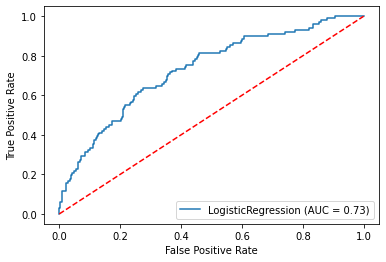

In [ ]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(lr,test_data,final_testY)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

### **Hypertuning Logistic Regression**

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)
grid_result = grid_search.fit(X_train, y_ros)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 30 folds for each of 15 candidates, totalling 450 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 196 tasks      | elapsed:    8.1s


Best: 0.680190 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


[Parallel(n_jobs=10)]: Done 450 out of 450 | elapsed:   15.2s finished


In [ ]:
pred=grid_search.predict(test_data)
print(classification_report(final_testY,pred))

              precision    recall  f1-score   support

           0       0.93      0.57      0.70       576
           1       0.24      0.77      0.37       102

    accuracy                           0.60       678
   macro avg       0.59      0.67      0.54       678
weighted avg       0.83      0.60      0.65       678



<Figure size 1080x576 with 0 Axes>

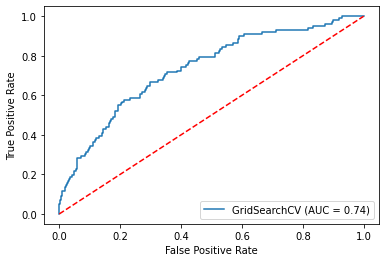

In [ ]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search,test_data,final_testY)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

We can see on hypertunning our LogisticRegression model we see there is improvement in recall but precision is still not better.

##**2. Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_ros)
pred=dt.predict(test_data)
print(classification_report(final_testY,pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       576
           1       0.20      0.24      0.22       102

    accuracy                           0.74       678
   macro avg       0.53      0.53      0.53       678
weighted avg       0.76      0.74      0.75       678



### **Hypertunning Decision Tree**

In [ ]:
# Creating lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(estimator=model, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)

# Fitting the grid search
clf_GS.fit(X_train, y_ros)
# Viewing The Best Parameters
print('Best Criterion:', clf_GS.best_estimator_.get_params())
print('Best max_depth:', clf_GS.best_estimator_.get_params())
print('Best Number Of Components:', clf_GS.best_estimator_.get_params())
print(); print(clf_GS.best_estimator_.get_params())

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 30 folds for each of 15 candidates, totalling 450 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:    4.9s
[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed:   11.0s


Best Criterion: {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best max_depth: {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best Number Of Components: {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

{'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1

[Parallel(n_jobs=10)]: Done 450 out of 450 | elapsed:   16.2s finished


In [ ]:
pred=clf_GS.predict(test_data)
print(classification_report(final_testY,pred))

              precision    recall  f1-score   support

           0       0.93      0.57      0.70       576
           1       0.24      0.77      0.37       102

    accuracy                           0.60       678
   macro avg       0.59      0.67      0.54       678
weighted avg       0.83      0.60      0.65       678



##**3.XGBoost**

In [ ]:
xg = XGBClassifier()
xg.fit(X_train,y_ros)
pred=xg.predict(test_data)
print(classification_report(final_testY,pred))

              precision    recall  f1-score   support

           0       0.92      0.64      0.75       576
           1       0.25      0.67      0.36       102

    accuracy                           0.64       678
   macro avg       0.58      0.65      0.56       678
weighted avg       0.81      0.64      0.69       678



##**Hypertunning XGboost using Bayesian Optimization**

For computationally intensive tasks, grid search and random search can be painfully time-consuming with less luck of finding optimal parameters. These methods hardly rely on any information that the model learned during the previous optimizations. Bayesian Optimization on the other hand constantly learns from previous optimizations to find a best-optimized parameter list and also requires fewer samples to learn or derive the best values.

Two common terms that you will come across when reading any material on Bayesian optimization are :

    Surrogate model and 
    Acquisition function.

The Gaussian process is a popular surrogate model for Bayesian Optimization. What it does is that it defines a prior function that can be used to learn from previous predictions or believes about the objective function.

Acquisition function, on the other hand, is responsible for predicting the sampling points in the search space. Acquisition function follows the exploration and exploitation principle. It is a function that allows the optimizer to exploit an optimal region until a better value is obtained. The goal is to maximise the acquisition function to determine the next sampling point. The terms exploration and exploitation might seem familiar to you if you have learned about Thompson Sampling or Upper Confidence Bound which revolves around the same principle. These are also used as acquisition functions.

In [ ]:
pip install bayesian-optimization

In [ ]:
#Importing necessary libraries
from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.metrics import mean_squared_error

#Converting the dataframe into XGBoost’s Dmatrix object
dtrain = xgb.DMatrix(X_train, label=y_ros)

#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
     params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'rmse'}
    #Cross validating with the specified parameters in 5 folds and 70 iterations
     cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
    #Return the negative RMSE
     return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,120)
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.2843   |  0.5556   |  0.09392  |  8.984    |  115.1    |
|  2        | -0.2842   |  0.4737   |  0.2991   |  6.291    |  110.3    |
|  3        | -0.3099   |  0.4912   |  0.7362   |  6.212    |  105.2    |
|  4        | -0.2842   |  0.6567   |  0.4024   |  8.724    |  113.5    |
|  5        | -0.2882   |  0.2269   |  0.6195   |  5.721    |  111.8    |
|  6        | -0.2855   |  0.04521  |  0.7862   |  8.696    |  119.4    |
|  7        | -0.33     |  0.5034   |  0.3891   |  4.72     |  106.9    |
|  8        | -0.3089   |  0.9392   |  0.5607   |  9.503    |  107.2    |
|  9        | -0.5      |  0.0      |  0.0      |  9.768    |  100.0    |
|  10       | -0.3394   |  0.0      |  1.0      |  7.955    |  109.6    |
|  11       | -0.5      |  1.0      |  0.0      |  3.0      |  120.0    |
|  12       | -0.3448   |  0.9745   | 

In [ ]:
#Extracting the best parameters
params = xgb_bo.max['params']
print(params)

#Converting the max_depth and n_estimator values from float to int
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

#Initialize an XGBClassifier with the tuned parameters and fit the training data
from xgboost import XGBClassifier
classifier2 = XGBClassifier(**params).fit(X_train, y_ros)

#predicting for test set
test_p2 = classifier2.predict(test_data)

#Looking at the classification report
print(classification_report(test_p2, final_testY))

{'gamma': 0.6566587861866964, 'learning_rate': 0.40239288885534563, 'max_depth': 8.724081921191033, 'n_estimators': 113.46148882708889}
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       589
           1       0.26      0.30      0.28        89

    accuracy                           0.80       678
   macro avg       0.58      0.59      0.58       678
weighted avg       0.81      0.80      0.80       678



##4. **K-Nearest Neighbors**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_ros)
pred=knn.predict(test_data)
print(classification_report(final_testY,pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       576
           1       0.24      0.55      0.33       102

    accuracy                           0.67       678
   macro avg       0.57      0.62      0.56       678
weighted avg       0.80      0.67      0.71       678



<Figure size 1080x576 with 0 Axes>

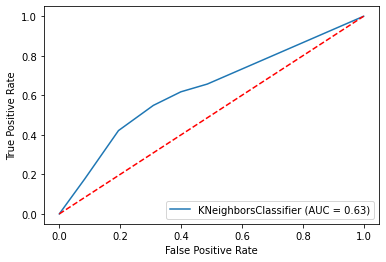

In [ ]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(knn,test_data,final_testY)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## **5.Support Vector Machine**

In [ ]:
clf = SVC()
clf.fit(X_train,y_ros)
pred=clf.predict(test_data)
print(classification_report(final_testY,pred))


              precision    recall  f1-score   support

           0       0.90      0.73      0.80       576
           1       0.26      0.53      0.35       102

    accuracy                           0.70       678
   macro avg       0.58      0.63      0.58       678
weighted avg       0.80      0.70      0.74       678



##**Hypertunning SVM**

In [ ]:
# define model and parameters
model = SVC()
kernel = ['rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)
grid_result = grid_search.fit(X_train, y_ros)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   21.0s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed:  4.1min
[Parallel(n_jobs=10)]: Done 300 out of 300 | elapsed:  4.6min finished


Best: 0.913374 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
pred=grid_search.predict(test_data)
print(classification_report(final_testY,pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       576
           1       0.21      0.27      0.24       102

    accuracy                           0.73       678
   macro avg       0.54      0.55      0.54       678
weighted avg       0.77      0.73      0.75       678



<Figure size 1080x576 with 0 Axes>

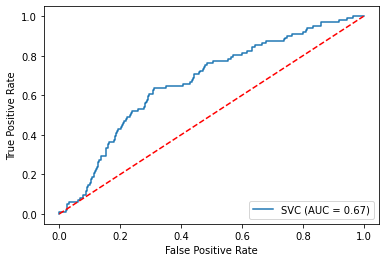

In [ ]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(clf,test_data,final_testY)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

After training each model and tuning their hyper-parameters using grid search, I evaluated and compared their performance using the following metrics:

*    **The accuracy score**: which is the ratio of the number of correct predictions to the total number of input samples. It measures the tendency of an algorithm to classify data correctly.
*    **The Recall Score**: Which is defined as the weighted harmonic mean of the test’s precision and recall. By using both precision and recall its gives a more realistic measure of a test’s performance. (Precision, also called the positive predictive value, is the proportion of positive results that truly are positive. Recall, also called sensitivity, is the ability of a test to correctly identify positive results to get the true positive rate).
*    **The Area under the ROC Curve (AUC)**: Which provides an aggregate measure of performance across all possible classification thresholds. It gives the probability that the model ranks a random positive example more highly than a random negative example

###**Here are the results:**

In [94]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Accuracy", "F1-score",'Recall'])
test.add_row(['1','Logistic Regression','0.60','0.65','0.71'])
test.add_row(['2','Decision Tree Classifier','0.60','0.75','0.77'])
test.add_row(['3','XGBoost','0.74','0.69','0.67'])
test.add_row(['4','KNearest Neighbors','0.67','0.55','0.57'])
test.add_row(['5','Support Vector Machine','0.70','0.58','0.74'])
print(test)

+-------+--------------------------+----------+----------+--------+
| SL NO |        MODEL_NAME        | Accuracy | F1-score | Recall |
+-------+--------------------------+----------+----------+--------+
|   1   |   Logistic Regression    |   0.60   |   0.65   |  0.71  |
|   2   | Decision Tree Classifier |   0.60   |   0.75   |  0.77  |
|   3   |         XGBoost          |   0.74   |   0.69   |  0.67  |
|   4   |    KNearest Neighbors    |   0.67   |   0.55   |  0.57  |
|   5   |  Support Vector Machine  |   0.70   |   0.58   |  0.74  |
+-------+--------------------------+----------+----------+--------+
